Epoch 1/100 - Loss: 2.3435
Epoch 11/100 - Loss: 1.4542
Epoch 21/100 - Loss: 1.0833
Epoch 31/100 - Loss: 0.8336
Epoch 41/100 - Loss: 0.7616
Epoch 51/100 - Loss: 0.7047
Epoch 61/100 - Loss: 0.6643
Epoch 71/100 - Loss: 0.6492
Epoch 81/100 - Loss: 0.6161
Epoch 91/100 - Loss: 0.6059
Epoch 100/100 - Loss: 0.5913

✅ Training Accuracy: 85.57%


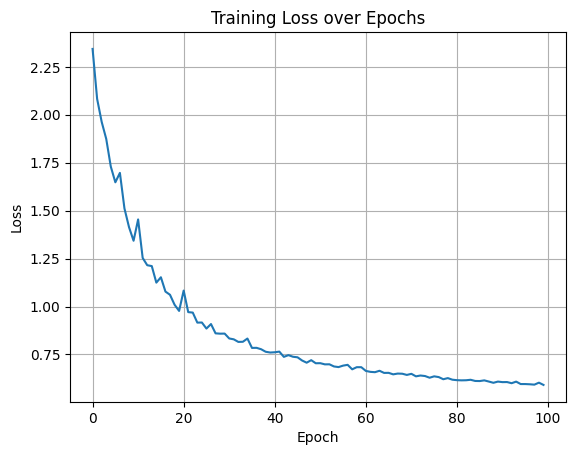

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load and split the data
data = np.load('X_train.npy')
labels = np.load('y_train.npy')
data = data.reshape(60000,784)
X = data/ 255.0  # normalize pixel values
y = labels

# One-hot encode labels
def one_hot_encode(y, num_classes):
    m = y.shape[0]
    encoded = np.zeros((m, num_classes))
    encoded[np.arange(m), y] = 1
    return encoded

y_encoded = one_hot_encode(y, num_classes=10)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Parameters
m, n = X_train.shape
num_classes = 10
learning_rate = 15
epochs = 100
batch_size = 64

# Initialize weights and bias
W = np.random.randn(n, num_classes) * 0.01
b = np.zeros((1, num_classes))

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Loss function (Cross-Entropy)
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred + 1e-15)
    loss = np.sum(y_true * log_likelihood) / m
    return loss

# Training loop with Mini-Batch Gradient Descent
loss_history = []

for epoch in range(epochs):
    # Shuffle training data
    indices = np.random.permutation(m)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    for i in range(0, m, batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        # Forward pass
        logits = np.dot(X_batch, W) + b
        probs = softmax(logits)

        # Compute gradients
        error = probs - y_batch
        dW = np.dot(X_batch.T, error) / batch_size
        db = np.sum(error, axis=0, keepdims=True) / batch_size

        # Update parameters
        W -= learning_rate * dW
        b -= learning_rate * db

    # Compute loss for tracking
    train_logits = np.dot(X_train, W) + b
    train_probs = softmax(train_logits)
    loss = compute_loss(y_train, train_probs)
    loss_history.append(loss)

    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}")
        # Significantly improved training accuracy by converting to dynamic learning rate
        learning_rate = 0.9*learning_rate

# Predictions
def predict(X):
    logits = np.dot(X, W) + b
    probs = softmax(logits)
    return np.argmax(probs, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
y_pred = predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"\n✅ Training Accuracy: {accuracy * 100:.2f}%")

# # Plot loss
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid()
plt.show()



 Final Test Accuracy on Uploaded File: 69.97%


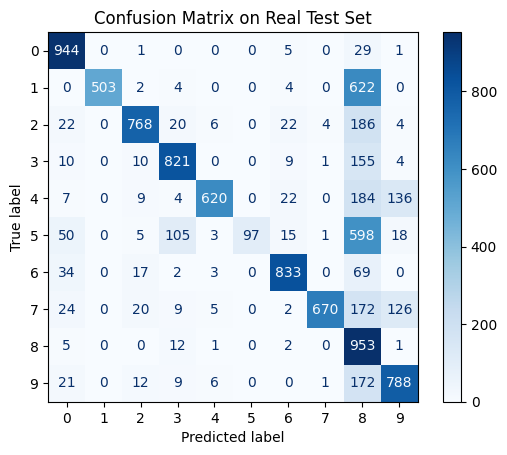

In [30]:
# --- Load the new test data ---
import pandas as pd
X_real_test = np.load("test-images.npy")
y_real_test = np.load("test-labels.npy")

X_real_test = X_real_test.reshape(X_real_test.shape[0],X_real_test.shape[1]*X_real_test.shape[2])
# Predict on the test set
y_real_pred = predict(X_real_test)

# Accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

acc = accuracy_score(y_real_test, y_real_pred)
print(f"\n Final Test Accuracy on Uploaded File: {acc * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_real_test, y_real_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Real Test Set")
plt.show()
